<a href="https://colab.research.google.com/github/IanMcDevitt/Interview/blob/main/Transformer_QR_WORKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install scikit-learn
!pip install bayesian-optimization
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install imbalanced-learn
!pip install tqdm
!pip install datetime
!pip install seaborn
!pip install scipy
!pip install joblib


In [2]:
import torch
from torch import nn
from torch.utils.data import TensorDataset
from scipy.stats import skew
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from torch.optim.lr_scheduler import StepLR
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import random
from torch.utils.data.distributed import DistributedSampler
import torch.distributed as dist
from sklearn.metrics import confusion_matrix
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessHour
from datetime import datetime, timedelta
import yfinance as yf


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import joblib
import torch.distributed as dist
from torch.nn.parallel import DistributedDataParallel

from torch.cuda.amp import autocast, GradScaler  # For mixed-precision
import gc
import os


In [84]:



# Compute Momentum
import numpy as np

def weighted_mid_price(P_ask, V_bid, P_bid, V_ask):
    # Ensure the inputs are numpy arrays
    P_ask = np.array(P_ask)
    V_bid = np.array(V_bid)
    P_bid = np.array(P_bid)
    V_ask = np.array(V_ask)

    return (P_ask * V_bid + P_bid * V_ask) / (V_bid + V_ask)

def volume_based_momentum(P_wmid_t, P_wmid_t_minus_n):
    return P_wmid_t - P_wmid_t_minus_n

# def compute_spectral_features_for_sub_windows(main_window, sub_window_length=15, overlap=7):
#     sub_windows = extract_sub_windows(main_window, sub_window_length, overlap)
#     aggregated_features = []

#     for sub_window in sub_windows:
#         fft_values = np.fft.fft(sub_window)
#         psd_values = np.abs(fft_values) ** 2

#         aggregated_features.extend([fft_values, psd_values])

#     return aggregated_features

def compute_fourier_coefficients(fft_values):
    return fft_values

def compute_power_spectral_density(psd_values):
    return psd_values

def compute_spectral_centroid(fft_values, psd_values, sampling_rate=1):
    frequencies = np.fft.fftfreq(len(fft_values), d=sampling_rate)
    spectral_centroid = np.sum(frequencies * psd_values) / np.sum(psd_values)
    return spectral_centroid

def compute_spectral_rolloff(fft_values, psd_values, sampling_rate=1, percentile=0.85):
    frequencies = np.fft.fftfreq(len(fft_values), d=sampling_rate)
    spectral_rolloff = frequencies[np.where(np.cumsum(psd_values) >= percentile * np.sum(psd_values))[0][0]]
    return spectral_rolloff

def compute_spectral_flux(psd_values):
    flux = np.sum((np.diff(psd_values)) ** 2)
    return flux
# Update this method to consider NumPy's array capabilities
def rolling_window(a, window, step_size=1):
    shape = (a.shape[0] - window + 1, window)
    strides = (a.strides[0], a.strides[0])
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)[::step_size]

def extract_sub_windows(main_window, sub_window_length, overlap):
    step_size = sub_window_length - overlap
    return rolling_window(main_window, sub_window_length, step_size)

def compute_all_spectral_features(main_window, sub_window_length=15, overlap=7, sampling_rate=1):
    sub_windows = extract_sub_windows(main_window, sub_window_length, overlap)

    fft_values = np.fft.fft(sub_windows, axis=1)
    psd_values = np.abs(fft_values) ** 2

    fourier_coefficients = compute_fourier_coefficients(fft_values)
    power_spectral_density = compute_power_spectral_density(psd_values)

    # Since the following computations are scalar for each sub-window, we will loop through them
    spectral_centroids = [compute_spectral_centroid(fft, psd, sampling_rate) for fft, psd in zip(fft_values, psd_values)]
    spectral_rolloffs = [compute_spectral_rolloff(fft, psd, sampling_rate) for fft, psd in zip(fft_values, psd_values)]
    spectral_fluxes = [compute_spectral_flux(psd) for psd in psd_values]

    # Combine all spectral features for each sub_window
    all_spectral_features = [
        np.concatenate([coeff, psd, [centroid], [rolloff], [flux]])
        for coeff, psd, centroid, rolloff, flux in zip(fourier_coefficients, power_spectral_density, spectral_centroids, spectral_rolloffs, spectral_fluxes)
    ]
    print(len(all_spectral_features))
    print(all_spectral_features[0].shape)
    return np.array(all_spectral_features)

# Compute Momentum using vectorized operations
def compute_momentum(P_ask, V_bid, P_bid, V_ask, n_period=5):
    w_mid_price = weighted_mid_price(P_ask, V_bid, P_bid, V_ask)
    momentum_values = np.diff(w_mid_price, n=n_period)
    return momentum_values




# ... Your existing functions for weighted mid price and volume-based momentum

# Using Numba's JIT compiler
# @numba.jit(nopython=True)
def extract_variables_from_x(x):
    best_bid_price_array = x[:, 0]
    best_bid_volume_array = x[:, 10]
    best_ask_price_array = x[:, 20]
    best_ask_volume_array = x[:, 30]


    # To get only the 'Log Return of Mid Price' column for these rows


    return best_bid_price_array, best_bid_volume_array, best_ask_price_array, best_ask_volume_array
def extract_features(x):
    # Assuming x contains all required information, extract the necessary variables
    P_bid, V_bid, P_ask, V_ask = extract_variables_from_x(x)


    batch_size, sequence_length = P_ask.shape
    all_batch_features = []

    for i in range(batch_size):
        # Extract features for each individual batch
        p_ask = P_ask[i]
        v_bid = V_bid[i]
        p_bid = P_bid[i]
        v_ask = V_ask[i]

        # Compute spectral features
        spectral_features = compute_all_spectral_features(weighted_mid_price(p_ask, v_bid, p_bid, v_ask))

        # Compute momentum
        momentum_values = compute_momentum(p_ask, v_bid, p_bid, v_ask)

        # Ensure both feature vectors are of the same length
        min_length = min(len(spectral_features), len(momentum_values))
        spectral_features = spectral_features[:min_length]
        momentum_values = momentum_values[:min_length]

        # Combine spectral and momentum features
        combined_features = np.concatenate([spectral_features, momentum_values.reshape(-1, 1)], axis=1)

        # Append to all batch features
        all_batch_features.append(combined_features)

    all_batch_features = np.array(all_batch_features)

    # Ensure the output shape is (batch_size, sequence_length, feature_dim)
    all_batch_features = all_batch_features[:, :sequence_length, :]

    # Return the features
    return torch.tensor(all_batch_features, dtype=torch.float32)


# class LearnablePositionalEncoding(nn.Module):
#     def __init__(self, d_model, max_len=5000):
#         super(LearnablePositionalEncoding, self).__init__()

#         self.norm = nn.LayerNorm(d_model)  # Add a LayerNorm
#         pe = torch.randn(max_len, d_model)
#         pe = pe.unsqueeze(0) # Add an extra dimension for batch size
#         self.register_parameter('pe', nn.Parameter(pe))

#     def forward(self, x):
#         x = x + self.pe[:, :x.size(1)]
#         return x

class LearnablePositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(LearnablePositionalEncoding, self).__init__()
        self.d_model = d_model
        self.max_len = max_len

        # Initialize the positional encoding as a learnable parameter
        self.pe = nn.Parameter(torch.randn(1, max_len, d_model))

        # Layer normalization
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        # Truncate or expand the positional encoding to match the input sequence length
        pe = self.pe[:, :x.size(1)]

        # Add positional encoding to the input
        x = x + pe

        # Apply layer normalization
        x = self.norm(x)

        return x
    # ... (Same as your code)

# ExtendedTransformerModel Class
class Swish(nn.Module):
    def __init__(self):
        super(Swish, self).__init__()
        self.beta = nn.Parameter(torch.ones(1))

    def forward(self, x):
        return x * torch.sigmoid(self.beta * x)

class Mish(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

class ExtendedTransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dropout, look_ahead):
        super(ExtendedTransformerModel, self).__init__()

        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = LearnablePositionalEncoding(d_model)
        self.input_embedding = nn.Linear(input_dim, d_model)
        # Apply He initialization to input_embedding
        #nn.init.kaiming_normal_(self.input_embedding.weight, mode='fan_out', nonlinearity='relu')
        nn.init.kaiming_normal_(self.input_embedding.weight, nonlinearity='relu')
        self.Mish1 = Mish()  # Added

        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=dropout)
        layer_norm = nn.LayerNorm(d_model)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers, layer_norm)

        # self.fc1 = nn.Linear(d_model, 64)
        # nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        self.Mish2 = Mish()  # Added

        # self.fc2 = nn.Linear(64, 11)
        # nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='relu')
        # self.swish3 = Swish()  # Added

        self.decoder = nn.Linear(d_model, look_ahead)
        nn.init.kaiming_normal_(self.decoder.weight, nonlinearity='relu')
        #nn.init.kaiming_normal_(self.decoder.weight, mode='fan_out', nonlinearity='relu')


    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src):

      if self.src_mask is None or self.src_mask.size(0) != len(src):
          device = src.device
          mask = self._generate_square_subsequent_mask(len(src)).to(device)
          self.src_mask = mask

      src = self.input_embedding(src)
      src = self.Mish1(src)  # Swish after input embedding
      #src = F.leaky_relu(src, 0.01)
      #print(f"Shape after input_embedding: {src.shape}")  # Debug print

      src = self.pos_encoder(src)
      #print(f"Shape after pos_encoder: {src.shape}")  # Debug print

      output = self.transformer_encoder(src, self.src_mask)
      #print(f"Shape after transformer_encoder: {output.shape}")  # Debug print

      # output = self.fc1(output)
      output = self.Mish2(output)  # Swish after fc1

      #print(f"Shape after fc1: {output.shape}")  # Debug print

      #output = self.selu(output)
      #print(f"Shape after leaky_relu: {output.shape}")  # Debug print

      # Adding the new LayerNorm and Linear layers in the forward pass
      #output = self.layer_norm_64_to_20(output)
      #print(f"Shape after layer_norm_64_to_20: {output.shape}")  # Debug print

      # output2 = self.fc2(output)
      # output2 = self.swish3(output2)  # Swish after fc2

      #print(f"Shape after fc2: {output2.shape}")  # Debug print

      output = self.decoder(output)
      #print(f"Shape after decoder: {output.shape}")  # Debug print
      final_output = output[:, -1, :]
      #print(f'Final shape: {final_output.shape}')
      return final_output,  output



def some_function_to_get_temporal_encoding(seq_len, batch_size, device):
    time = np.linspace(0, 1, seq_len)
    encoding = np.sin(2 * np.pi * time).reshape(1, 1, seq_len)
    encoding = np.repeat(encoding, batch_size, axis=0)  # Repeat along the batch dimension
    return torch.tensor(encoding, dtype=torch.float32).to(device)

class DilatedConv(nn.Module):
    def __init__(self):
        super(DilatedConv, self).__init__()

        self.conv1 = nn.Conv1d(23, 128, kernel_size= 1)

        self.conv2 = nn.Conv1d(128, 128, kernel_size=1, dilation=1)
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        self.swish2 = Swish()

        self.conv3 = nn.Conv1d(128, 128, kernel_size=2, dilation=2)
        nn.init.kaiming_normal_(self.conv3.weight, nonlinearity='relu')
        self.swish3 = Swish()

        self.conv4 = nn.Conv1d(128, 128, kernel_size=2, dilation=4)
        nn.init.kaiming_normal_(self.conv4.weight, nonlinearity='relu')
        self.swish4 = Swish()

        self.conv5 = nn.Conv1d(128, 128, kernel_size=3, dilation=8)
        nn.init.kaiming_normal_(self.conv5.weight, nonlinearity='relu')
        self.swish5 = Swish()

        self.conv6 = nn.Conv1d(128, 128, kernel_size=3, dilation=16)
        nn.init.kaiming_normal_(self.conv6.weight, nonlinearity='relu')
        self.swish6 = Swish()





        self.conv10 = nn.Conv1d(128, 6,kernel_size=1, dilation=1)


        self.conv11 = nn.Conv1d(6, 6, kernel_size=2, dilation=2)
        nn.init.kaiming_normal_(self.conv11.weight, nonlinearity='relu')
        self.swish11 = Swish()


        self.conv12 = nn.Conv1d(6, 6, kernel_size=1, dilation=1)
        nn.init.kaiming_normal_(self.conv12.weight, nonlinearity='relu')
        self.swish12 = Swish()

        self.conv13 = nn.Conv1d(6, 6, kernel_size=1,dilation=1)
        nn.init.kaiming_normal_(self.conv13.weight, nonlinearity='relu')
        self.swish13 = Swish()

        # Assuming self.upsample is your upsampling layer and 6 is the number of features
        self.upsample = nn.ConvTranspose1d(6, 6, kernel_size=57, stride=1, padding=0)

    def forward(self, x):
        # Assuming x has shape [256, 6, 50]  (batch_size, num_features, seq_len)
        batch_size, _, seq_len = x.size()
        device = x.device
        x = self.conv1(x)


        x = self.swish2(self.conv2(x))
        x = self.swish3(self.conv3(x))
        x = self.swish4(self.conv4(x))
        x = self.swish5(self.conv5(x))
        x = self.swish6(self.conv6(x))
        #x = self.swish7(self.conv7(x))
        #x = self.swish8(self.conv8(x))
        #x = self.swish9(self.conv9(x))
        x = self.conv10(x)
        x = self.swish11(self.conv11(x))
        x = self.swish12(self.conv12(x))
        x = self.swish13(self.conv13(x))

        # x1 = self.conv1(x)
        # x2 = self.conv2(x1)
        # x3 = self.conv3(x2)
        # x4 = self.conv4(x3)

        # Get temporal encoding, assume it has shape [50, 1]

        # Expand dimensions to match batch size and feature dimension
        x4_upsample = self.upsample(x)

          # Add thi
        # Get the updated temporal encoding
        temporal_encoding = some_function_to_get_temporal_encoding(seq_len, batch_size, device)


        # Concatenate along the feature dimension
        x_concat = torch.cat((x4_upsample, temporal_encoding), dim=1)  # Should now have 7 features

        # Permute dimensions
        x_final = x_concat.permute(0, 2, 1)

        return x_final


class QuantileRegressionModel(nn.Module):
    def __init__(self, num_quantiles, look_ahead, d_model, dropout_rate=0.3):
        super(QuantileRegressionModel, self).__init__()

        self.look_ahead = look_ahead
        self.num_quantiles = num_quantiles
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(d_model, look_ahead * num_quantiles)  # Adjusted to map from d_model to look_ahead*num_quantiles
        self.activation = Mish()

    def forward(self, x):
        # Assuming base_model_output is the last layer output of the base model
        #base_model_output = self.base_model(x)
        # No need to unpack base_model_output if it directly provides the required output
        #base_model_output = self.dropout(base_model_output)

        # Apply fully connected layer to predict quantiles
        quantile_predictions = self.fc(x)

        # Apply activation function if needed (optional depending on your model architecture and requirements)
        quantile_predictions = self.activation(quantile_predictions)

        # Reshape quantile_predictions to [batch_size, look_ahead, num_quantiles]
        quantile_predictions = quantile_predictions.view(-1, self.look_ahead, self.num_quantiles)

        return quantile_predictions


class QuantileRegressionLayer(nn.Module):
    def __init__(self, input_dim, num_quantiles):
        super(QuantileRegressionLayer, self).__init__()
        self.fc = nn.Linear(input_dim, input_dim * num_quantiles)
        self.activation = Mish()

    def forward(self, x):
            quantile_preds = self.fc(x)
            #quantile_preds = self.activation(quantile_preds)
            # Reshape to have separate dimension for quantiles
            quantile_preds = quantile_preds.view(x.shape[0], x.shape[1], -1)

            return quantile_preds

class QuantileLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.quantiles = [.01, .05, .1, 0.25, .5,  0.75, .9, .95, .99]

    def forward(self, preds, target):
        assert not target.requires_grad
        assert preds.size(0) == target.size(0)
        losses = []
        for i, q in enumerate(self.quantiles):
            errors = target - preds[:, :, i]  # assuming preds is now (batch, look_ahead, num_quantiles)
            losses.append(torch.max((q - 1) * errors, q * errors).unsqueeze(2))  # Add one more dimension
        loss = torch.mean(torch.sum(torch.cat(losses, dim=2), dim=[1,2]))  # Sum over all quantiles and look_ahead
        return loss


class FractionalDifferential(nn.Module):
    def __init__(self,):
        super(FractionalDifferential, self).__init__()
        self.alpha = alpha =.6
        self.full_length = full_length = 80
        self.window_size = window_size = 15
        self.padding_type = padding_type='zero'
        self.coefficients = self.compute_coefficients()

    def compute_coefficients(self):
        coefs = [1.0]
        for k in range(1, self.window_size):
            coef = -self.alpha * coefs[-1] * (self.window_size - k + 1) / k
            coefs.append(coef)
        return torch.tensor(coefs[::-1], dtype=torch.float32)

    def forward(self, x):
        self.coefficients = self.coefficients.to(x.device)
        if self.padding_type == 'zero':
            x_padded = F.pad(x, (0, 0, self.window_size-1, 0), 'constant', 0)
        elif self.padding_type == 'mirror':
            x_padded = F.pad(x, (0, 0, self.window_size-1, 0), 'reflect')

        output = F.conv1d(x_padded, self.coefficients.view(1, 1, -1))
        output_short_windows = F.avg_pool1d(output.permute(0, 2, 1), self.full_length // self.window_size).permute(0, 2, 1)

        return output_short_windows




# Final ExtendedDilatedConvTransformer Class (Assuming DilatedConvTransformer exists)

# ExtendedDilatedConvTransformer class
class ExtendedDilatedConvTransformer(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, look_ahead):
        super(ExtendedDilatedConvTransformer, self).__init__()

        # CNN layer (Dilated Conv)
        #self.dilated_conv = DilatedConv(in_channels=45, out_channels=20, kernel_size=2, dilation=1, padding=1)  # Example arguments
        self.dilated_conv = DilatedConv()  # Example arguments

        # Feature extraction layer
        #self.feature_extractor = FractionalDifferential(alpha, full_length, window_size, padding_type)  # Placeholder, replace with actual implementation

        # Transformer
        self.extended_transformer = ExtendedTransformerModel(7, d_model, nhead, num_layers, 0.1, look_ahead)
        # Quantile Regression
        self.qr_model = QuantileRegressionLayer(input_dim=20, num_quantiles=9)


        #self.fc2 = nn.Linear(64, look_ahead)
        #self.quantile_fc = nn.Linear(64, 9)
        # x_feat = extract_features(x.detach().cpu().numpy())  # Detach and convert to numpy for feature extraction
        # x_feat = torch.tensor(x_feat, dtype=torch.float32).to(x.device)  # Convert back to tensor and send to the same device as x
        # x_diff = self.differential_layer(x_feat)

        # x_combined = torch.cat((x, x_diff), dim=-1)

    def forward(self, x):
        #print(f'ExtendedDilatedConvTransformer Input shape: {x.shape}')

        # x = x.transpose(1, 2)
        # # #print(f'After transpose shape: {x.shape}')

        # x_cnn = self.dilated_conv(x)
        #print(f'After dilated_conv shape: {x_cnn.shape}')

        # Transformer
        x_transformed, qr = self.extended_transformer(x)
        #print(f'After extended_transformer shape: {x_transformed.shape}')

        #  # Fully connected layers
        # x = self.fc1(x_transformed)
        # x = self.relu(x)
        # x = self.fc2(x)


        # Fully connected layer for quantile output
        qr_outputs = self.qr_model(x_transformed)
        #print(f'After qr_model shape: {qr_outputs.shape}
        #qr_outputs = self.qr_model()
        #print(f'After qr_model shape: {qr_outputs.shape}')

        # Fully connected layers for quantile output
        # quantile_outputs = self.quantile_fc(qr_outputs)
        # print(f'After quantile_fc shape: {quantile_outputs.shape}')

        return x_transformed, qr_outputs
# Create Model Instance, Data Loading, and Training Placeholders (Same as before)
# ...


In [25]:


# Here is the nhead adjustment function we defined previously
def adjust_nhead(d_model, nhead):
    # Adjust nhead value to be a divisor of d_model
    while d_model % nhead != 0:
        nhead -= 1
    return nhead



def setup_training_components(params, input_dim):
    # Extract hyperparameters
    d_model = int(params['d_model'])
    num_layers = int(params['num_layers'])
    nhead = int(params['nhead'])
    dropout = params.get('dropout', 0.1)
    look_ahead = int(params['look_ahead'])
    kernel_size = params.get('kernel_size', 2)
    dilation_rates = params.get('dilation_rates', [1, 3, 6, 12, 24])
    padding = params.get('padding', 2)

    # Assign computation device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Model choice
    model_type = params.get('model_type', 'ExtendedDilatedConvTransformer')
    if model_type == 'TransformerModel':
        model = TransformerModel(input_dim, d_model, nhead, num_layers, dropout, look_ahead)
    elif model_type == 'ExtendedDilatedConvTransformer':
        model = ExtendedDilatedConvTransformer(input_dim, d_model, nhead, num_layers, look_ahead)
    else:
        raise ValueError(f"Invalid model_type: {model_type}")

    model = model.to(device)
    # model = DistributedDataParallel(model, device_ids=[device])  # Wrap model for DDP
    model = model.float()
    # Initialize optimizer
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    optimizer_choice = params.get('optimizer', 'Adam')
    if optimizer_choice == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_choice == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        raise ValueError(f"Invalid optimizer choice: {optimizer_choice}")

    # Initialize GradScaler for mixed-precision training
    scaler = GradScaler()

    # Initialize loss function
    # Assume QuantileLoss is defined elsewhere
    mse_criterion = torch.nn.MSELoss()
    quantile_criterion = QuantileLoss()
    # Initialize Learning Rate Scheduler
    scheduler = StepLR(optimizer, step_size=10, gamma=0.98)



    return model, optimizer, mse_criterion, quantile_criterion, device, scaler, scheduler



class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

def create_data_loaders(X_train, y_train, X_val, y_val, batch_size):
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
    # X_train_tensor = torch.tensor(X_train, dtype=torch.float16)
    # y_train_tensor = torch.tensor(y_train, dtype=torch.float16)

    # X_val_tensor = torch.tensor(X_val, dtype=torch.float16)
    # y_val_tensor = torch.tensor(y_val, dtype=torch.float16)
    print(X_train[0])

    print(type(X_train), type(y_train))
    print(X_train.shape, y_train.shape)
    # Create TensorDatasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)


    # Create dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

    return train_dataloader, val_dataloader

# class LearnablePositionalEncoding(nn.Module):
#     def __init__(self, d_model, max_len=5000):
#         super(LearnablePositionalEncoding, self).__init__()

#         self.norm = nn.LayerNorm(d_model)  # Add a LayerNorm
#         pe = torch.randn(max_len, d_model)
#         pe = pe.unsqueeze(0) # Add an extra dimension for batch size
#         self.register_parameter('pe', nn.Parameter(pe))

#     def forward(self, x):
#         x = x + self.pe[:, :x.size(1)]
#         return x

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dropout, look_ahead):
        super(TransformerModel, self).__init__()

        self.model_type = 'Transformer'
        self.src_mask = None
        self.pos_encoder = LearnablePositionalEncoding(d_model)
        self.input_embedding = nn.Linear(input_dim, d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=dropout)
        layer_norm = nn.LayerNorm(d_model)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers, layer_norm)
        self.decoder = nn.Linear(d_model, look_ahead)  # we predict 'look_ahead' number of outputs

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.input_embedding(src)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, self.src_mask)
        output = self.decoder(output)
        #return output
        return output[:, -1, :]  # Only consider the last output of the sequence




In [77]:
def train_model(model, criterion, quantile_criterion, optimizer, dataloader, params, device, scaler, schedulerr, epoch):
    model.train()

    # Gradient Clipping
    clip = params['gradient_clip']

    # Learning Rate Scheduler
    scheduler = schedulerr

    epoch_loss = 0
    epoch_quantile_loss = 0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc='Training')
    for x_batch, y_batch in progress_bar:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        regular_output, quantile_outputs = model(x_batch)
        regular_loss = criterion(regular_output, y_batch)
        quantile_loss = quantile_criterion(quantile_outputs, y_batch)

        # Compute total loss
        loss = regular_loss * 20  +  quantile_loss

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Clip the gradients
        #torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        # Check the gradients
        # for name, param in model.named_parameters():
        #     if param.requires_grad:
        #         print(f"Layer: {name}, Gradient Norm: {param.grad.data.norm(2).item()}")

        # Step the optimizer
        optimizer.step()

        epoch_loss += regular_loss.item()
        epoch_quantile_loss += quantile_loss.item()

        # Update progress bar
        progress_bar.set_postfix({
            'loss': epoch_loss / (len(x_batch) + 1e-7),
            'quantile_loss': epoch_quantile_loss / (len(x_batch) + 1e-7)
        })

    scheduler.step()

    epoch_loss /= len(dataloader)
    epoch_quantile_loss /= len(dataloader)

    return epoch_loss, epoch_quantile_loss


def evaluate_model(model, criterion, quantile_criterion, dataloader, device):
    model.eval()

    local_epoch_loss = 0
    local_rmse = 0
    local_mae = 0
    local_quantile_loss = 0

    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # Removed autocast
            regular_output, quantile_outputs = model(x_batch)
            regular_loss = criterion(regular_output, y_batch)
            quantile_loss = quantile_criterion(quantile_outputs, y_batch)

            local_epoch_loss += regular_loss.item()
            local_quantile_loss += quantile_loss.item()

            local_rmse += torch.sqrt(criterion(regular_output, y_batch)).item()
            local_mae += torch.abs(regular_output - y_batch).mean().item()

    avg_epoch_loss = local_epoch_loss / len(dataloader)
    avg_quantile_loss = local_quantile_loss / len(dataloader)
    avg_rmse = local_rmse / len(dataloader)
    avg_mae = local_mae / len(dataloader)

    return avg_epoch_loss,  avg_rmse, avg_mae, avg_quantile_loss


# def evaluate_model(model, criterion, quantile_criterion, dataloader, device):
#     model.eval()

#     local_epoch_loss = 0
#     local_rmse = 0
#     local_mae = 0
#     local_quantile_loss = 0

#     with torch.no_grad():
#         for x_batch, y_batch in dataloader:
#             x_batch = x_batch.to(device)
#             y_batch = y_batch.to(device)

#             regular_output, quantile_outputs = model(x_batch)  # Assuming model returns regular and quantile outputs

#             regular_loss = criterion(regular_output, y_batch)
#             quantile_loss = quantile_criterion(quantile_outputs, y_batch)

#             local_epoch_loss += regular_loss.item()
#             local_quantile_loss += quantile_loss.item()

#             local_rmse += torch.sqrt(criterion(regular_output, y_batch)).item()
#             local_mae += torch.abs(regular_output - y_batch).mean().item()

#     # Aggregate metrics across all processes (assuming loss, rmse and mae are float)
#     global_epoch_loss = sum(dist.all_reduce(local_epoch_loss, op=dist.ReduceOp.SUM))
#     global_quantile_loss = sum(dist.all_reduce(local_quantile_loss, op=dist.ReduceOp.SUM))
#     global_rmse = sum(dist.all_reduce(local_rmse, op=dist.ReduceOp.SUM))
#     global_mae = sum(dist.all_reduce(local_mae, op=dist.ReduceOp.SUM))

#     # Average by the number of processes
#     global_epoch_loss /= dist.get_world_size()
#     global_quantile_loss /= dist.get_world_size()
#     global_rmse /= dist.get_world_size()
#     global_mae /= dist.get_world_size()

#     return global_epoch_loss / len(dataloader), global_quantile_loss / len(dataloader), global_rmse / len(dataloader), global_mae / len(dataloader)



In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

# Assuming the file name is 'AMD_final_data_updated.csv'
df = pd.read_csv('AMD_final_data_updated.csv')

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [86]:

def adjust_nhead(d_model, nhead):
    while d_model % nhead != 0:
        nhead -= 1
    return nhead


def transform_params(params):
    params_transformed = params.copy()
    optimizer_mapping = 'Adam'
    imbalance_strategy_mapping = 'none'
    params_transformed['optimizer'] = optimizer_mapping
    params_transformed['imbalance_strategy'] = imbalance_strategy_mapping
    return params_transformed


  # params = {
  #     'learning_rate': (1e-5, 1e-4),
  #     'weight_decay': (1e-4, 1e-3),
#     'batch_size': (32, 256),
#     'epochs': (10, 100),
#     'sequence_length': (10, 60),
#     'look_ahead': (1, 5),
#     'ema_window': (10, 50),
#     'rsi_window': (10, 50),
#     'short_ma_window': (5, 20),
#     'long_ma_window': (21, 100),
#     'macd_short_window': (10, 30),
#     'macd_long_window': (30, 60),
#     'd_model': (128, 512),
#     'nhead': (2, 8),
#     'num_layers': (1, 6),
#     # 'class_weight_0': (1, 10),
#     # 'class_weight_1': (1, 10),
#     # 'class_weight_2': (1, 10),
#     'gradient_clip': (0.2, 0.60),
#     'gamma': (0.8, 0.99),
#     #'optimizer': (0),  # for ['Adam', 'SGD']
#     #'imbalance_strategy': (0),  # for ['smote', 'undersampling', 'none'],
# }

# params = {
#     'learning_rate': 1e-6, # Broaden the range a bit
#     #'learning_rate': 1e-6, # Broaden the range a bit
#     'weight_decay': 1e-2,  # Starting from zero and broaden the range
#     'batch_size': 256,  # You can go smaller or larger depending on your GPU memory
#     'epochs': 120,  # You may want to use early stopping in practice
#     'sequence_length':  60, # Depending on your time series
#     'look_ahead': 1, # Depending on your time series
#     'smoothing_average': 1,
#     'd_model':  1024, # Depending on the complexity of your model and data
#     'nhead':  8, # Could go higher for larger 'd_model'
#     'num_layers':  6, # Could go higher for more complex data
#     'gradient_clip': .21,  # Usually small value
#     'gamma': 0.98,  # Usually close to 1
# }
params = {
    'learning_rate': 1e-2,  #  it was 6
    'weight_decay': 1e-3,  # Starting from zero and broaden the range
    #'batch_size': 256, # Can be smaller or larger depending on GPU memory
    'batch_size': 512,
    'epochs': 15,  # Early stopping can be implemented
    'sequence_length': 160,  # Depending on your time series
    'look_ahead': 20,  # Depending on your time series
    'smoothing_average': 1,
    'd_model': 1024,  # Depending on the complexity of your model and data
    'nhead': 16 ,  # Could go higher for larger 'd_model'
    'num_layers': 2,  # Could go higher for more complex data
    'gradient_clip': 1.5,  # Usually small value
    'gamma': 0.9,  # Usually close to 1
    'dropout': 0.3,  # Dropout rate in the ExtendedTransformerModel
    'momentum_period': 3,  # N_period for momentum calculation
    'dilation_rates': [1, 3, 6, 12, 24],  # DilatedConv dilation rates
    'kernel_size': 2,  # Kernel size for DilatedConv
    'conv_out_channels': [60, 60, 80, 80, 60],  # Output channels for DilatedConv layers
    'feature_extractor_params': {},  # Parameters specific to the feature extraction process
    'differential_layer_params': {},  # Parameters for the differential layer
    'fc1_out_features': 64,  # Number of output features in the first fully connected layer
}

scaler = MinMaxScaler()
scaler_y = MinMaxScaler()
def z_score_normalize_features_feature_wise(features):
    """
    Apply Z-score normalization to each feature within each window separately in the features array,
    handling cases where standard deviation is zero by preventing division by zero.
    """
    mean = np.mean(features, axis=1, keepdims=True)
    std = np.std(features, axis=1, keepdims=True)
    # Prevent division by zero by setting std to 1 where it's 0
    std_adjusted = np.where(std == 0, 1, std)
    normalized_features = (features - mean) / std_adjusted
    return normalized_features

def z_score_normalize_sequence_labels(labels):
    """
    Apply Z-score normalization to each sequence in labels array, handling cases where standard deviation is zero
    by preventing division by zero.
    """
    mean = np.mean(labels, axis=1, keepdims=True)
    std = np.std(labels, axis=1, keepdims=True)
    # Prevent division by zero by setting std to 1 where it's 0
    std_adjusted = np.where(std == 0, 1, std)
    normalized_labels = (labels - mean) / std_adjusted
    return normalized_labels

def preprocess_and_scale_data(market_data, params):
    print("Starting Preprocessing and Scaling...")

    params = transform_params(params)
    integer_params = ['batch_size', 'epochs',  'look_ahead', 'd_model', 'nhead', 'num_layers']

    for param in integer_params:
        params[param] = round(params[param])

    sequence_length = int(params['sequence_length'])
    look_ahead = int(params['look_ahead'])
    smoothing_average = int(params['smoothing_average'])

    print(f"Sequence length: {sequence_length}, Look ahead: {look_ahead}, Smoothing average: {smoothing_average}")

    if "Timestamp" in market_data.columns:
        market_data = market_data.drop(columns=["Timestamp"])

    data_array = market_data.to_numpy()

    print("Data converted to NumPy array.")
    del market_data
    gc.collect()

    features_array, labels_array = create_sequences(data_array, sequence_length, look_ahead)
    print(f"Features array and Labels array created.")
    print(f"Input shape: {features_array.shape}, Labels shape: {labels_array.shape}")

    del data_array
    gc.collect()

    train_size = int(len(features_array) * 0.8)
    X_train, X_val = features_array[:train_size], features_array[train_size:]
    y_train, y_val = labels_array[:train_size], labels_array[train_size:]
    print(f"Train and Validation data separated. Train size: {len(X_train)}, Validation size: {len(X_val)}")

# Apply Min-Max Scaling
        # Z-score Normalize the training data features

    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)


    y_train_scaled = scaler_y.fit_transform(y_train)
    y_val_scaled = scaler_y.transform(y_val)

    batch_size = int(params['batch_size'])
    train_dataloader, val_dataloader = create_data_loaders(X_train_scaled, y_train_scaled,  X_val_scaled, y_val_scaled, batch_size)
    print(f"Data loaders created with batch size: {batch_size}")

    # joblib.dump(scaler, 'feature_scaler.pkl')
    # joblib.dump(scaler_y, 'label_scaler.pkl')
    # print("Scalers saved to disk.")

    input_dim = X_train_scaled.shape[2]
    print(f"Input dimension: {input_dim}")

    model, optimizer, mse_criterion, quantile_criterion, device, scaler_Grad, scheduler = setup_training_components(params, input_dim)
    print("Training components set up.")

    print("Preprocessing and Scaling Completed.")
    return train_dataloader, val_dataloader, scaler_Grad, model, optimizer, mse_criterion, quantile_criterion, scheduler, device



def objective_func(params, train_loader, val_loader, scaler, best_loss, model, optimizer, mse_criterion, quantile_criterion, scheduler, device):
    # Preprocess the data
    params = transform_params(params)
    # Round the relevant parameters
    integer_params = ['batch_size', 'epochs', 'sequence_length', 'look_ahead', 'd_model', 'nhead', 'num_layers']
    for param in integer_params:
        params[param] = round(params[param])

    # input_dim = X_train_scaled.shape[2]

    # # Setup the training components
    # model, optimizer, criterion, device = setup_training_components(params, input_dim)

    # Create DataLoaders
    #train_loader, val_loader = create_data_loaders(X_train_scaled, y_train, X_val_scaled, y_val, batch_size=int(params['batch_size']))

    # Train and evaluate the model
    epochs = int(params['epochs'])

    for epoch in range(epochs):

        # # Set the distributed sampler epoch for each new epoch
        # if isinstance(train_loader.sampler, torch.utils.data.distributed.DistributedSampler):
        #     train_loader.sampler.set_epoch(epoch)

        train_loss, train_quantile_loss = train_model(model, mse_criterion, quantile_criterion, optimizer, train_loader, params, device, scaler, scheduler,epoch)#, train_quantile_loss
        val_loss, val_rmse, val_mae, val_quantile_loss = evaluate_model(model, mse_criterion, quantile_criterion, val_loader, device)#val_quantile_loss,

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save({
                'model_state_dict': model.state_dict(),
            }, 'model.pth')

        print(f"Epoch {epoch+1} / {epochs} - Training Loss: {train_loss}, Validation Loss: {val_loss}, RMSE: {val_rmse}, MAE: {val_mae}")
        # Prediction step for a batch from the validation set for visualization
        model.eval()
        with torch.no_grad():
              inputs, labels = next(iter(val_loader))
              inputs, labels = inputs.to(device), labels.to(device)
              predictions, quantiles = model(inputs)

              # Assuming predictions and labels are already correctly shaped
              predictions_np = scaler_y.inverse_transform(predictions.cpu().numpy()) # Adjust shape if needed
              labels_np = scaler_y.inverse_transform(labels.cpu().numpy()) # Adjust shape if needed

              # Prepare to store inverse transformed quantiles
              quantiles_inverse_list = []

              for q in range(quantiles.size(-1)):  # Loop through each quantile
                  # Flatten each quantile to 2D for inverse transformation
                  current_quantile_flat = quantiles[:, :, q].cpu().numpy()
                  # Inverse transform the current quantile
                  current_quantile_inverse = scaler_y.inverse_transform(current_quantile_flat).reshape(-1, 20)  # Reshape back to original
                  # Store the inverse transformed quantile
                  quantiles_inverse_list.append(current_quantile_inverse)

              # Convert list to array for easier plotting
              quantiles_inverse_np = np.array(quantiles_inverse_list)

              # Plotting
              plt.figure(figsize=(15, 7))
              time_steps = np.arange(predictions_np.shape[1])  # Assuming second dimension is time
              plt.plot(time_steps, labels_np[0], label='Actual', color='blue')
              plt.plot(time_steps, predictions_np[0], label='Predicted Median', linestyle='--', color='red')

              # Plot each quantile
              if epoch == epochs -1:
                  quantile_labels = ['.01', '.05', '.1', '0.25', '.5','0.75', '.9','.95','.99']
                  quantile_colors = [ 'green', 'green', 'green', 'green', 'red','red','red','red','red']
                  for i in range(quantiles_inverse_np.shape[0]):  # Loop through quantiles
                      plt.plot(time_steps, quantiles_inverse_np[i, 0, :], label=f'Quantile {quantile_labels[i]}', linestyle=':', color=quantile_colors[i])

              plt.title('Actual vs Predicted Sequences with Quantiles')
              plt.xlabel('Time Step')
              plt.legend()
              plt.show()



    return -best_loss


def create_sequences(data, sequence_length, look_ahead):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length - look_ahead + 1):
        sequences.append(data[i : i + sequence_length])
        # Get the closing price as label
        label = data[i + sequence_length : i + sequence_length + look_ahead, -1]  # assuming closing price is the last feature
        labels.append(label)
    return np.array(sequences), np.array(labels)





# # Optimize
# optimizer = BayesianOptimization(
#     f= objective_func(params, features, labels),
#     pbounds=params,
# )
# optimizer.maximize(init_points=10, n_iter=50)




In [69]:


def fetch_minute_data_for_date():
    url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/minute/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=50000&apiKey=EhaZMjpI0_J9AhiVbg65HkAdbdkx67s1"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()['results']
        return data
    else:
        print("Failed to fetch data:", response.text)
        return []

data_points = fetch_minute_data_for_date()
if data_points:
    data = pd.DataFrame(data_points)
    data.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)

    epsilon = 1e-8  # Small value to avoid division by zero

    # Check for inf and NaN values and drop them
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)

    # Calculate Log Returns
    for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
        data[f'Log_Return_{column}'] = np.log(data[column] / data[column].shift(1) + epsilon)
        # Calculate Variance for log returns of each column

    # Calculate ROC for Close
    data['ROC_Close'] = data['Close'].pct_change()

    # Calculate Price Range and its Percent Change
    data['Price_Range'] = data['High'] - data['Low']
    data['Log_Return_Price_Range'] = np.log(data['Price_Range'] + epsilon)

    # Optionally: Calculate Variance for Price Range

    # Clean up the DataFrame by removing the original and intermediate columns if necessary
    columns_to_keep = ['Log_Return_Open', 'Log_Return_High', 'Log_Return_Low', 'Log_Return_Volume', 'ROC_Close', 'Log_Return_Price_Range', 'Log_Return_Close']
    data = data[columns_to_keep]
     # Check for inf and NaN values and drop them
        # Replace inf/-inf with NaN, then drop NaNs
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(inplace=True)

    print(data.head())
    print(len(data))
else:
    print("No data fetched")




   Log_Return_Open  Log_Return_High  Log_Return_Low  Log_Return_Volume  \
1         0.005118        -0.000668        0.004753          -0.483252   
2         0.001275         0.003334        0.001640           0.187990   
3         0.001395        -0.001453        0.000546          -0.262400   
4        -0.000909        -0.000849       -0.001275           0.184439   
5         0.000788         0.000849        0.001517           0.119826   

   ROC_Close  Log_Return_Price_Range  Log_Return_Close  
1   0.000365               -1.660731          0.000365  
2   0.002308               -0.755023          0.002306  
3  -0.000848               -1.966113         -0.000849  
4  -0.001152               -1.560648         -0.001153  
5   0.002004               -2.302585          0.002002  
49999


Starting Preprocessing and Scaling...
Sequence length: 160, Look ahead: 20, Smoothing average: 1
Data converted to NumPy array.
Features array and Labels array created.
Input shape: (49820, 160, 7), Labels shape: (49820, 20)
Train and Validation data separated. Train size: 39856, Validation size: 9964


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


[[0.48599047 0.43105404 0.56950111 ... 0.49531644 0.8250527  0.50396214]
 [0.41200535 0.48981505 0.52398132 ... 0.52340897 0.8696386  0.53202532]
 [0.41430822 0.41951562 0.50798504 ... 0.4777838  0.81001949 0.48642017]
 ...
 [0.38160724 0.51371368 0.50266216 ... 0.50758667 0.90051364 0.51622625]
 [0.41080265 0.41868475 0.51773539 ... 0.51194505 0.86525992 0.52057996]
 [0.43174355 0.44707044 0.50443049 ... 0.47255473 0.86749793 0.48118419]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(39856, 160, 7) (39856, 20)
Data loaders created with batch size: 512
Input dimension: 7
Training components set up.
Preprocessing and Scaling Completed.


Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.138, quantile_loss=3.04]


Epoch 1 / 40 - Training Loss: 0.7656262587182797, Validation Loss: 0.004612420848570764, RMSE: 0.06791270822286606, MAE: 0.054189083725214006


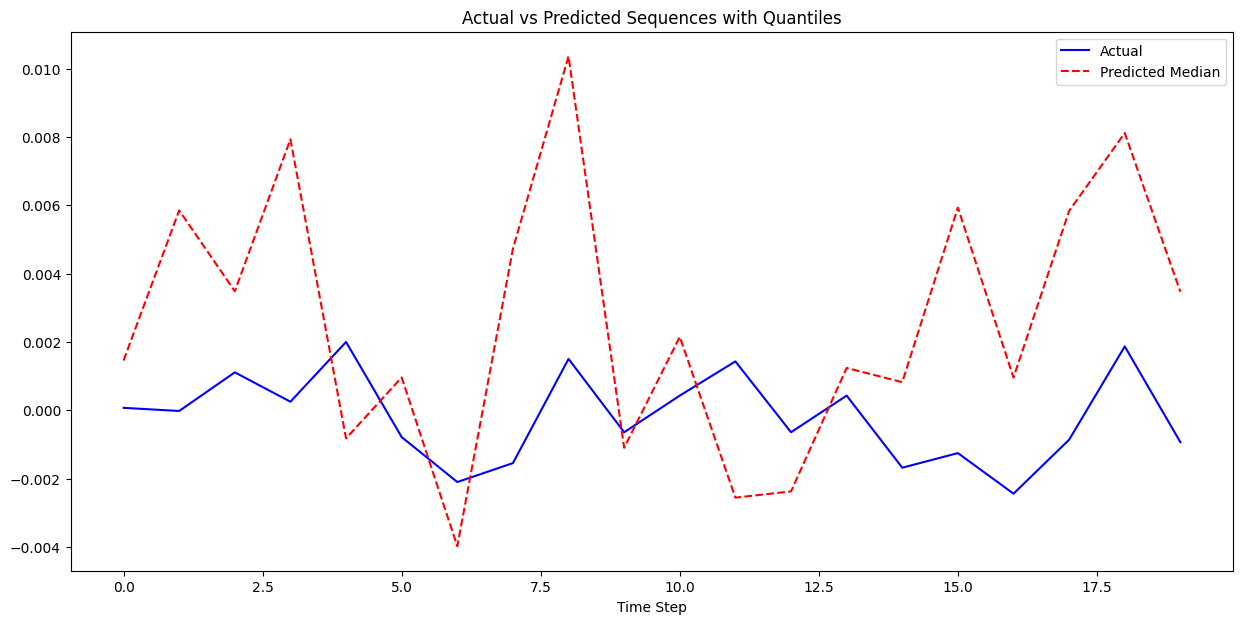

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.0128, quantile_loss=0.84]


Epoch 2 / 40 - Training Loss: 0.07087597735703756, Validation Loss: 0.0015534526493865997, RMSE: 0.03940715473145247, MAE: 0.03126771152019501


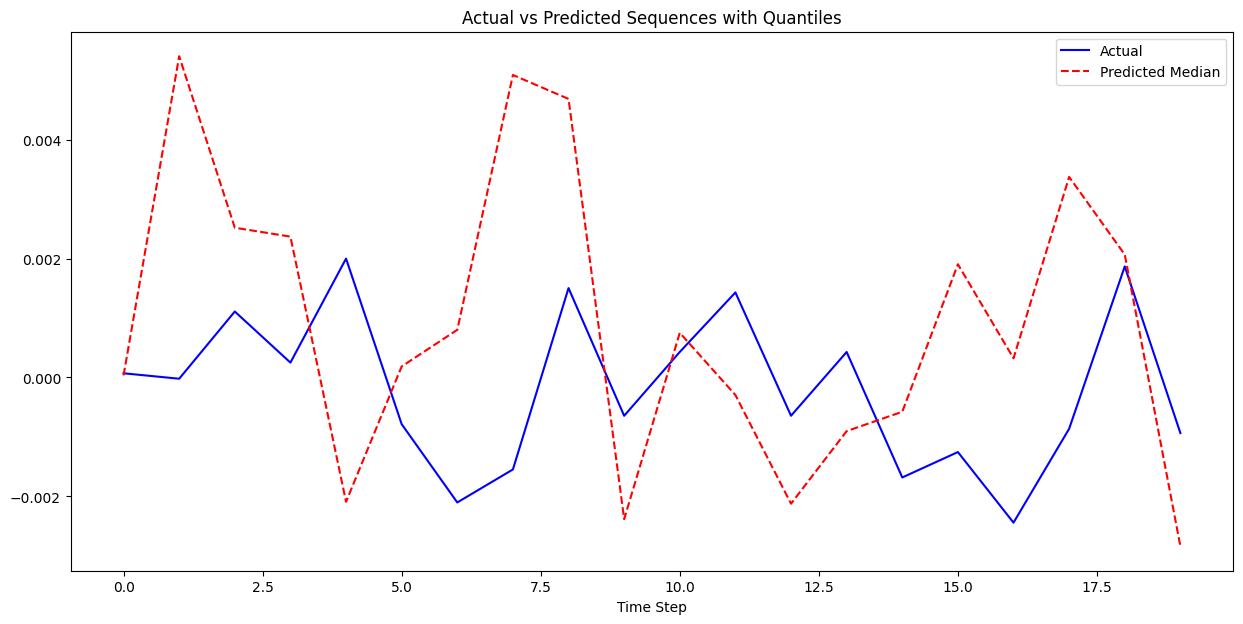

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.00289, quantile_loss=0.309]


Epoch 3 / 40 - Training Loss: 0.01598684830017961, Validation Loss: 0.004780109203420579, RMSE: 0.06913699954748154, MAE: 0.06197303589433432


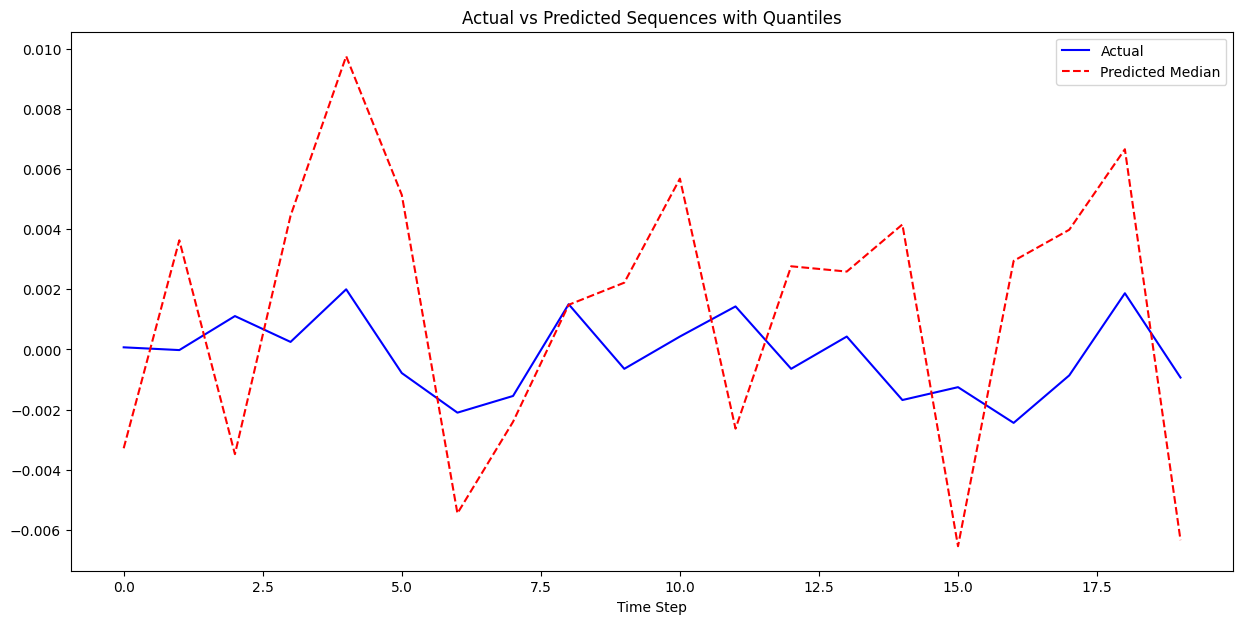

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.00198, quantile_loss=0.224]


Epoch 4 / 40 - Training Loss: 0.010964588703921972, Validation Loss: 0.0010648328519891948, RMSE: 0.03262055804952979, MAE: 0.02521166196092963


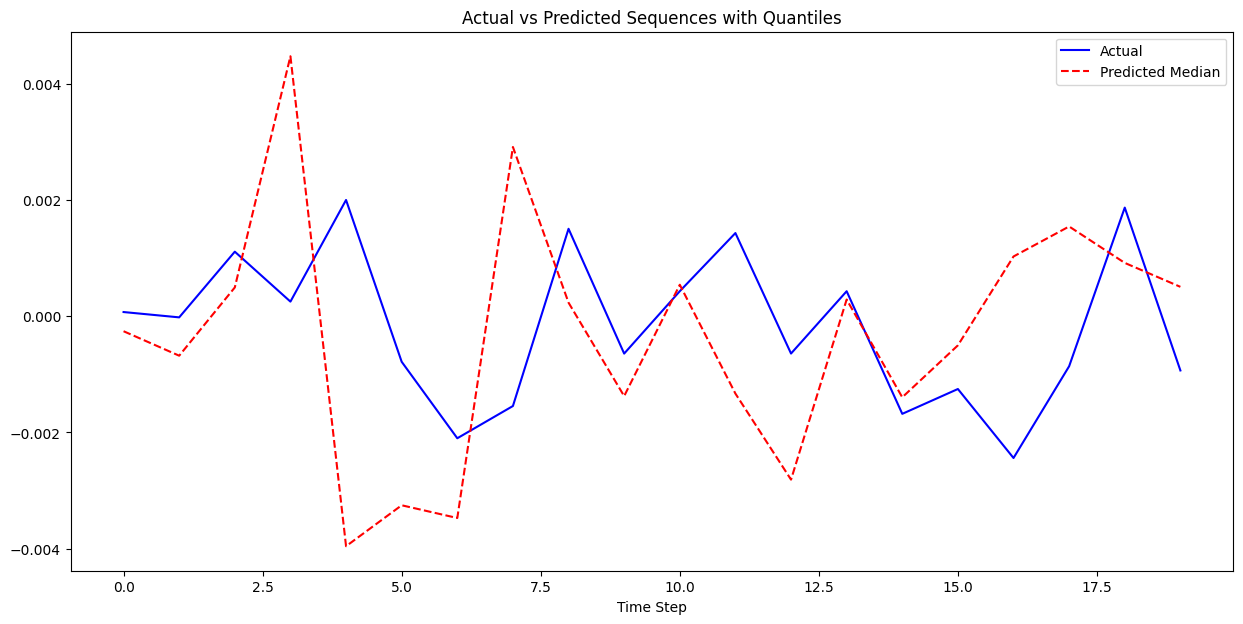

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.0012, quantile_loss=0.161]


Epoch 5 / 40 - Training Loss: 0.006667643546676025, Validation Loss: 0.0007272652932442724, RMSE: 0.026947799418121577, MAE: 0.020769291371107102


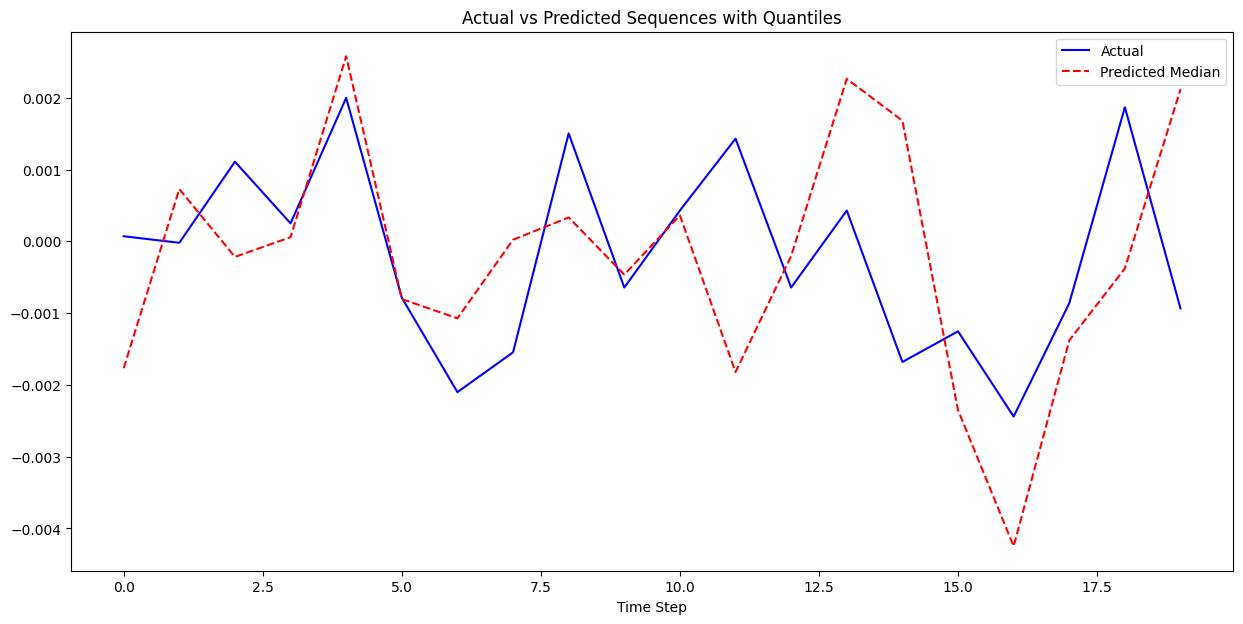

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000685, quantile_loss=0.12]


Epoch 6 / 40 - Training Loss: 0.003796478473724654, Validation Loss: 0.0004886299750069157, RMSE: 0.0220670479349792, MAE: 0.017140275426208974


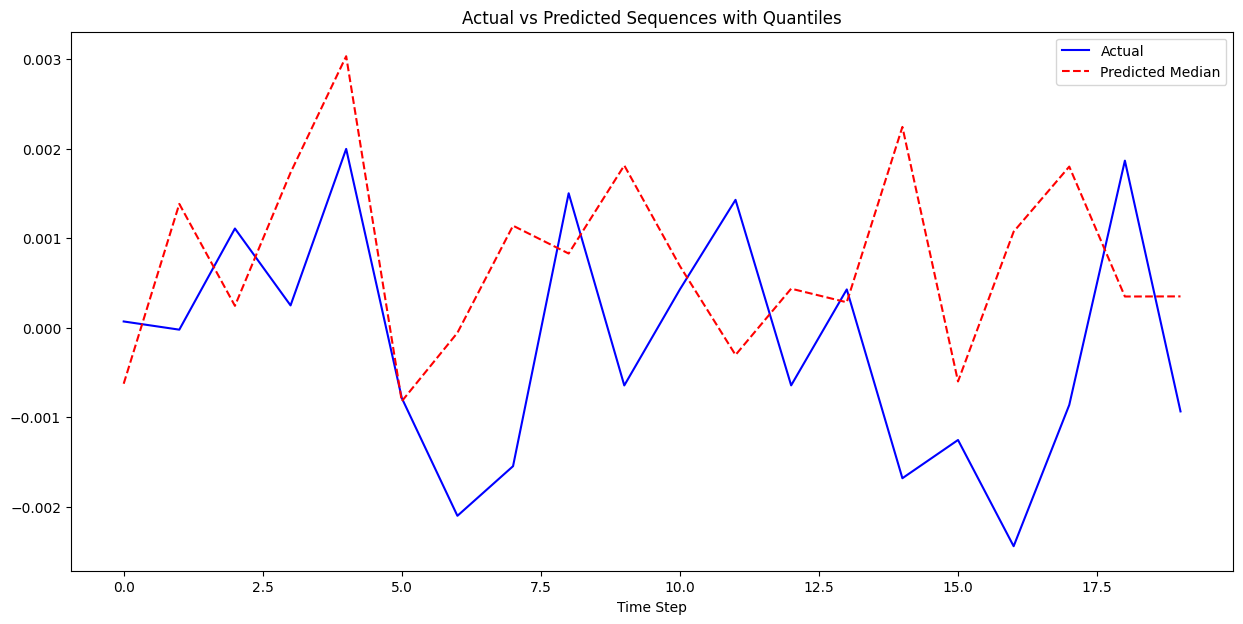

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000442, quantile_loss=0.107]


Epoch 7 / 40 - Training Loss: 0.002448341306239271, Validation Loss: 0.0003618801471020561, RMSE: 0.018965546833351256, MAE: 0.014919794676825405


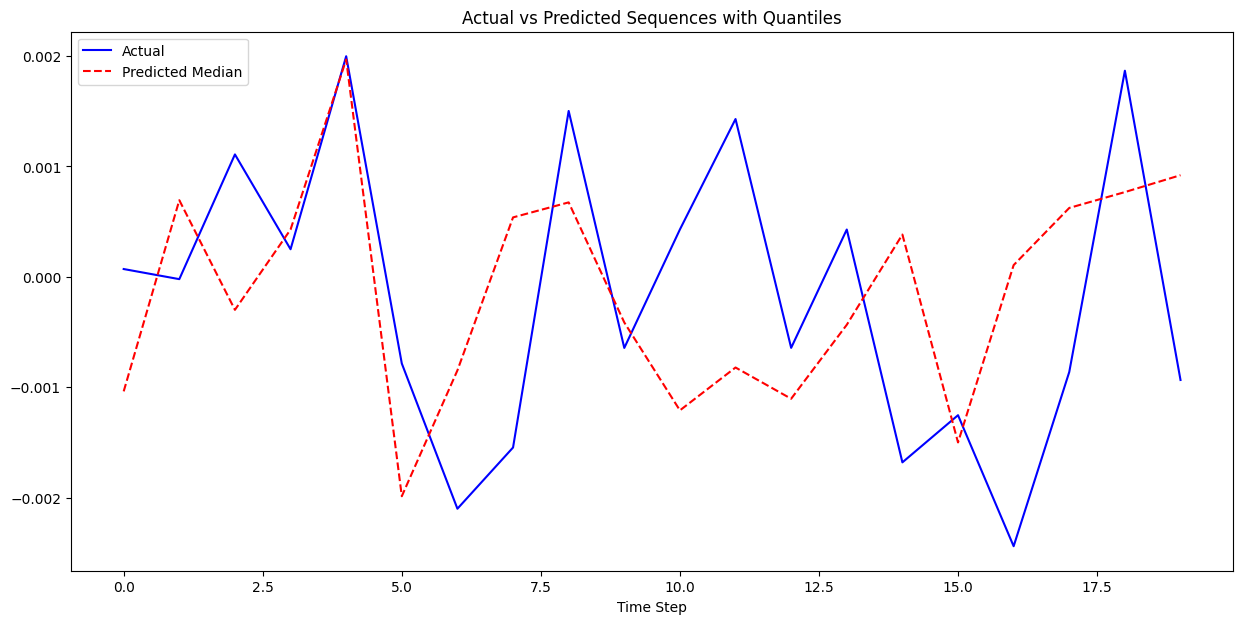

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000306, quantile_loss=0.103]


Epoch 8 / 40 - Training Loss: 0.001696072506885498, Validation Loss: 0.0004146105464315042, RMSE: 0.020314354728907347, MAE: 0.015739362128078936


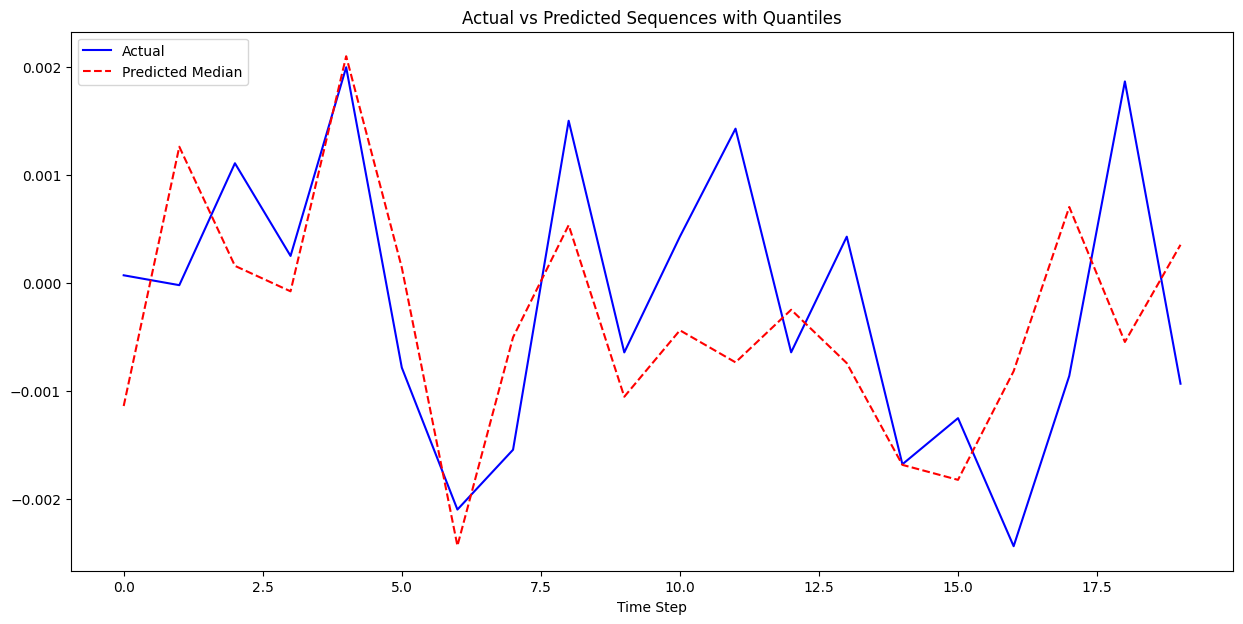

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000242, quantile_loss=0.102]


Epoch 9 / 40 - Training Loss: 0.0013406909241054493, Validation Loss: 0.00033203780476469545, RMSE: 0.018155760457739235, MAE: 0.014345679432153702


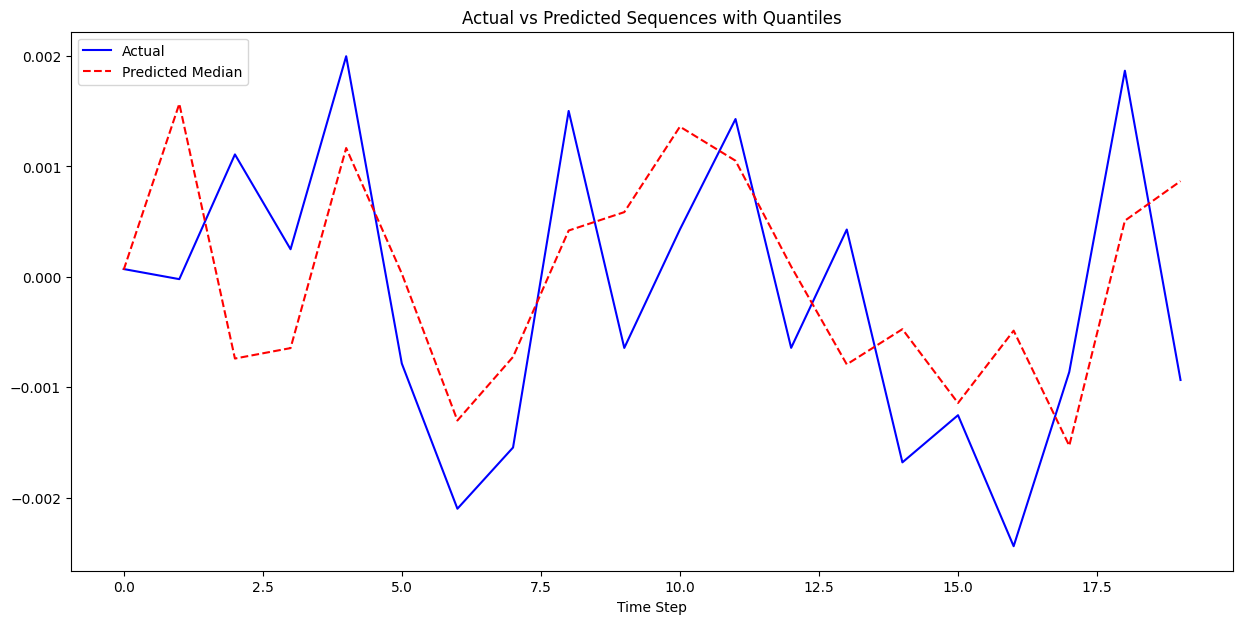

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000203, quantile_loss=0.105]


Epoch 10 / 40 - Training Loss: 0.001122019852911576, Validation Loss: 0.000540447054663673, RMSE: 0.023214273620396852, MAE: 0.01848344672471285


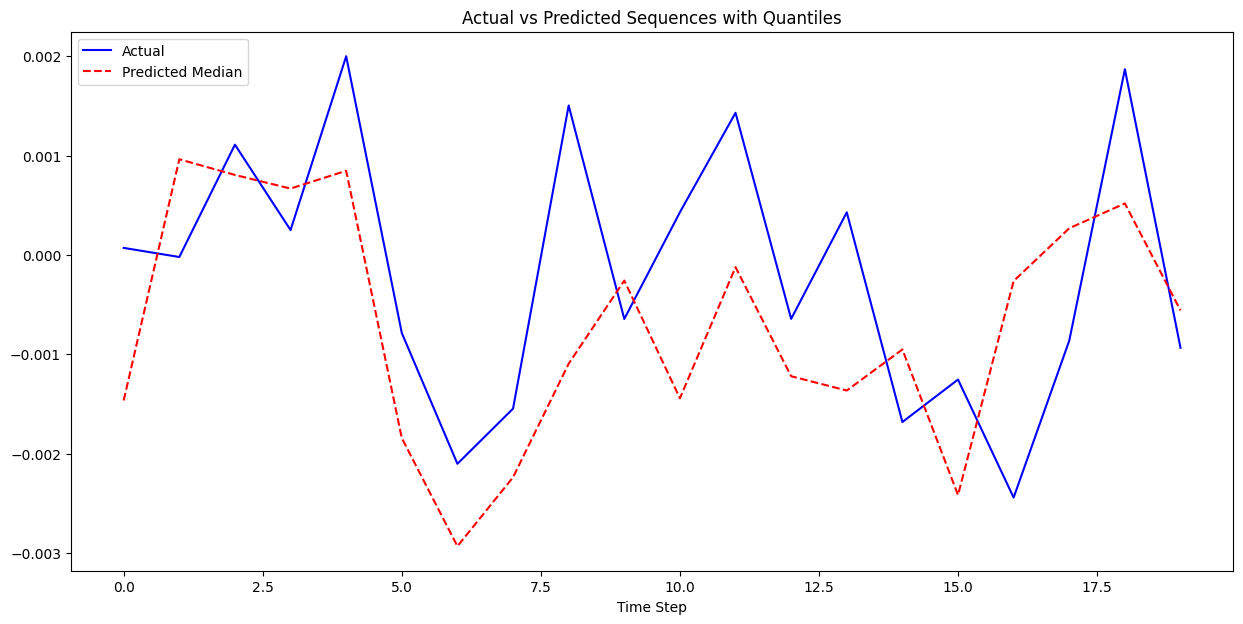

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=0.000186, quantile_loss=0.101]


Epoch 11 / 40 - Training Loss: 0.0010281149103927116, Validation Loss: 0.00044912514131283386, RMSE: 0.02114816727116704, MAE: 0.01656486080028117


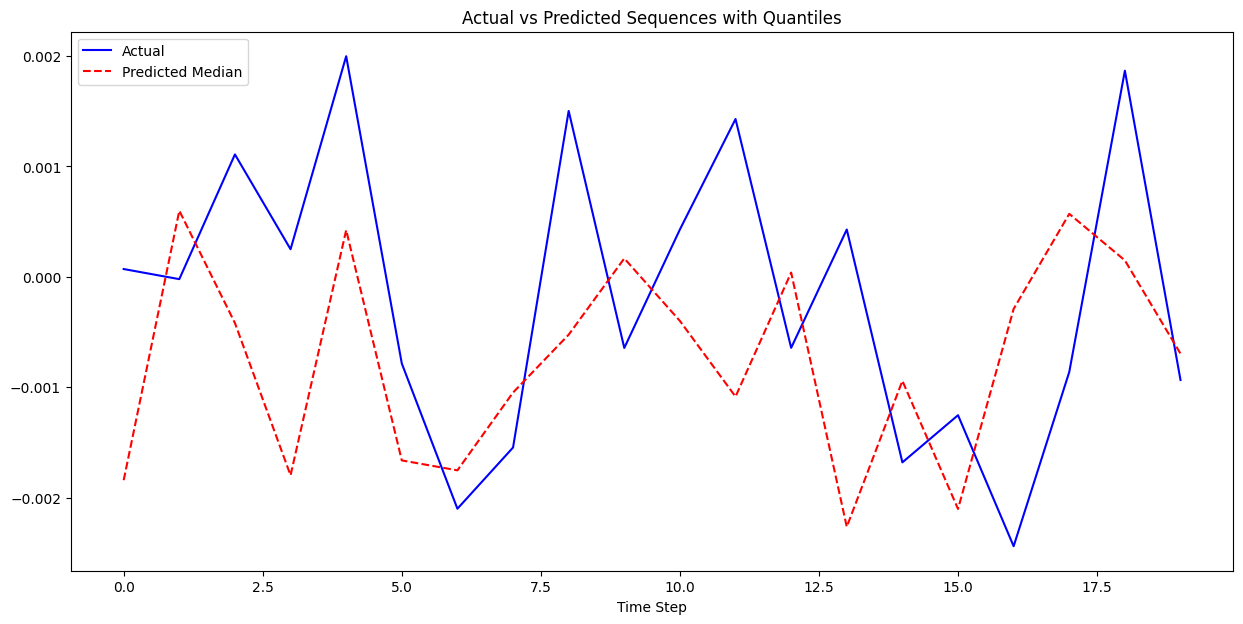

Training: 100%|██████████| 78/78 [01:02<00:00,  1.25it/s, loss=nan, quantile_loss=nan]


Epoch 12 / 40 - Training Loss: nan, Validation Loss: nan, RMSE: nan, MAE: nan


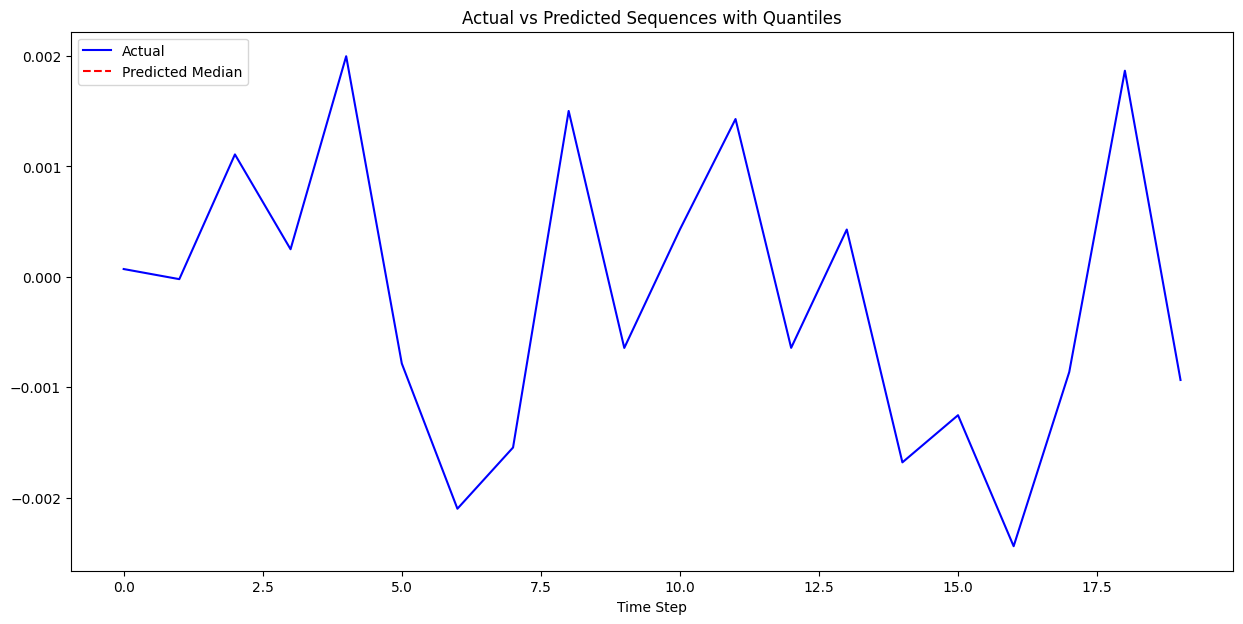

Training:  47%|████▋     | 37/78 [00:30<00:33,  1.22it/s, loss=nan, quantile_loss=nan]


KeyboardInterrupt: 

In [85]:
# # Fetch the historical data
# api = '74396A9D-6B7D-4024-AD10-583898E8B74A' # coinapi
# api_key = "LiWIDAR596fOH0VCUl3DAdbJw9c5VpBr" # polygon api


# import os


# def preprocess_data(data):
#     for col in ['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume']:
#         data[col] = data[col].apply(lambda x: np.fromstring(x.replace('[', '').replace(']', '').replace('\n', ''), sep=' ') if isinstance(x, str) else x)

#         # Expanding each level into its own column
#         for i in range(10):
#             data[f'{col} Level {i+1}'] = data[col].apply(lambda x: x[i] if isinstance(x, np.ndarray) and len(x) > i else np.nan)

#             # Calculating Log Return for each level
#             data[f'Log Return of {col} Level {i+1}'] = np.log(data[f'{col} Level {i+1}'] / data[f'{col} Level {i+1}'].shift(1))

#     # Drop NaNs introduced due to log return calculations
#     #data.dropna(subset=['Log Return of Mid Price', 'Log Return of Best Bid-Ask Spread'], inplace=True)

#     # Calculating Volume
#     data['Total Bid Volume'] = data['Bid Volume'].apply(np.sum)
#     data['Total Ask Volume'] = data['Ask Volume'].apply(np.sum)

#     # Calculating Best Bid-Ask Spread
#     # Calculating Best Bid-Ask Spread
#     data['Best Bid'] = data['Bid Price'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else np.nan)
#     data['Best Ask'] = data['Ask Price'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else np.nan)

#     # Calculating Mid Price
#     data['Mid Price'] = (data['Best Bid'] + data['Best Ask']) / 2

#     data['Best Bid-Ask Spread'] = data['Best Ask'] - data['Best Bid']
#     data.drop(columns=['Best Ask', 'Best Bid'], inplace=True)

#     # Calculating Volume Imbalance
#     data['Volume Imbalance'] = data['Total Bid Volume'] - data['Total Ask Volume']
#     data.drop(columns=['Total Bid Volume','Total Ask Volume'], inplace=True)

#     # Calculating Skewness
#     data['Skewness'] = data['Bid Price'].apply(skew) + data['Ask Price'].apply(skew)

#     def get_price(x, idx):
#         return x[idx] if isinstance(x, np.ndarray) and idx < len(x) else np.nan

#     data['Order Book Slope'] = ((data['Ask Price'].apply(lambda x: get_price(x, 3)) - data['Ask Price'].apply(lambda x: get_price(x, 0)))
#                                + (data['Ask Price'].apply(lambda x: get_price(x, 2)) - data['Ask Price'].apply(lambda x: get_price(x, 1)))
#                                - (data['Bid Price'].apply(lambda x: get_price(x, 3)) - data['Bid Price'].apply(lambda x: get_price(x, 0)))
#                                - (data['Bid Price'].apply(lambda x: get_price(x, 2)) - data['Bid Price'].apply(lambda x: get_price(x, 1))))

#     # Log Return Calculation for Mid Price and Best Bid-Ask Spread
#     data['Log Return of Best Bid-Ask Spread'] = np.log(data['Best Bid-Ask Spread'] / data['Best Bid-Ask Spread'].shift(1))
#     data['Log Return of Mid Price'] = np.log(data['Mid Price'] / data['Mid Price'].shift(1))

#     # Drop NaNs introduced due to log return calculations
#     data.dropna(subset=['Log Return of Mid Price', 'Log Return of Best Bid-Ask Spread'], inplace=True)
#     log_return_cols = [f'Log Return of {col} Level {i+1}' for col in ['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume'] for i in range(10)]
#     data.dropna(subset=log_return_cols, inplace=True)


#     for col in ['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume']:
#         for i in range(10):
#             data.drop(columns=[f'{col} Level {i+1}'], inplace=True)
#     for col in ['Bid Price', 'Bid Volume', 'Ask Price', 'Ask Volume','Mid Price', 'Best Bid-Ask Spread']:
#         data.drop(columns=[col], inplace=True)
#     return data



# def string_to_list(s):
#     if isinstance(s, str) and len(s) > 2:
#         return [float(item) for item in s[1:-1].split()]
#     else:
#         return []

# import numpy as np
# from scipy.stats import skew

# def concatenate_and_interpolate_files(directory_path, file_prefix):
#     all_data = []
#     subdir_path = directory_path
#     # Ensure that the current item is indeed a subdirectory
#     if os.path.isdir(subdir_path):

#         # 2. Loop through all files in the subdirectory
#         for file_name in os.listdir(subdir_path):
#             if file_name.startswith(file_prefix) and file_name.endswith('.csv'):
#                 file_path = os.path.join(subdir_path, file_name)
#                 data = pd.read_csv(file_path, converters={
#                     'Bid Price': lambda x: np.fromstring(x[1:-1], sep=' ') if x != '[]' else np.array([]),
#                     'Bid Volume': lambda x: np.fromstring(x[1:-1], sep=' ') if x != '[]' else np.array([]),
#                     'Ask Price': lambda x: np.fromstring(x[1:-1], sep=' ') if x != '[]' else np.array([]),
#                     'Ask Volume': lambda x: np.fromstring(x[1:-1], sep=' ') if x != '[]' else np.array([]),
#                 })

#                 # Convert 'Timestamp' to datetime format
#                 data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#                 # Drop rows with empty arrays
#                 empty_rows = (data['Bid Price'].apply(len) == 0) | \
#                              (data['Bid Volume'].apply(len) == 0) | \
#                              (data['Ask Price'].apply(len) == 0) | \
#                              (data['Ask Volume'].apply(len) == 0)
#                 data = data[~empty_rows]

#                 all_data.append(data)
#                 final_data = pd.concat(all_data, axis=0, ignore_index=True)
#     return preprocess_data(final_data )

# file_path = '/content/drive/MyDrive/filename8.csv'  # Replace with the actual path to the file on your desktop
# # log_return_cols = ['v', 'o', 'c', 'h', 'l','NVIDIA_closing_price']
# # additional_cols_to_scale = ['z_score', 'TR', 'ATR','day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday']

# # directory_path = file_path
# # file_prefix = "snapshot_"
# # market_data = concatenate_and_interpolate_files(directory_path, file_prefix)

# # # Example usage
# market_data = pd.read_csv(file_path)

# # market_data.set_index('Timestamp', inplace=True)
# print(market_data.columns)
# #market_data.set_index('Timestamp', inplace=False)

# market_data.drop(['Timestamp'], axis=1, inplace=True)
# market_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# print(len(market_data.columns))
# print(market_data.columns)
# market_data = market_data.round(6)
# # Define the list of columns to be dropped
# # columns_to_drop = []
# columns_to_drop = ['Log Return of Bid WMA Level 5', 'Log Return of Ask WMA Level 5',
#        'Log Return of Bid WMA Level 6', 'Log Return of Ask WMA Level 6',
#        'Log Return of Bid WMA Level 7', 'Log Return of Ask WMA Level 7',
#        'Log Return of Bid WMA Level 8', 'Log Return of Ask WMA Level 8',
#        'Log Return of Bid WMA Level 9', 'Log Return of Ask WMA Level 9',
#        'Log Return of Bid WMA Level 10', 'Log Return of Ask WMA Level 10',]
# # Drop the columns

# market_data.drop(columns=columns_to_drop, inplace=True)
# large_number = 1e2  # or any other large number you choose

# # Replace positive and negative infinite values with the large number
# market_data.replace([np.inf, -np.inf], large_number, inplace=True)

# # Verify if the columns are removed
# print(market_data.columns)

#market = 'btcusd'
#order_book_data = collect_order_book_data(api_base_url, market)

#order_book_data = get_order_book_data_from_cryptowatch()
#market_data = get_market_data_from_coinapi(api)
#market_data = get_1min_crypto_data(api_key)
#new_data = get_1min_crypto_data_test(api_key)


# print(type(market_data))
best_loss = np.inf
os.environ['MASTER_ADDR'] = 'localhost'
os.environ['MASTER_PORT'] = '12355'
# print(type(order_book_data))
#print(type(market_data))
# if dist.is_initialized():  # Check if already initialized
#     dist.destroy_process_group()
# dist.init_process_group(backend='nccl',  rank=0, world_size=1)

train_dataloader, val_dataloader, scalerGrad, model, optimizer, mse_criterion, quantile_criterion, scheduler, device = preprocess_and_scale_data(data, params)
best_loss = objective_func(params, train_dataloader, val_dataloader, scalerGrad, best_loss, model, optimizer, mse_criterion, quantile_criterion, scheduler, device)

# optimizer = BayesianOptimization(
#     # f= lambda **params: objective_func(params, market_data, order_book_data),
#      f= lambda **params: objective_func(params, X_train_scaled, y_train, X_val_scaled, y_val, scaler, scaler_y, best_loss)
# ,
#     pbounds=params,

# )
# optimizer.maximize(init_points=1, n_iter=1)




In [ ]:
#https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/minute/2022-01-09/2023-01-09?adjusted=true&sort=asc&apiKey=EhaZMjpI0_J9AhiVbg65HkAdbdkx67s1

# Function to fetch minute bars for a given date
def fetch_minute_data_for_date():
    url = f"https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/minute/2022-01-09/2023-01-09?adjusted=true&sort=asc&limit=50000&apiKey=EhaZMjpI0_J9AhiVbg65HkAdbdkx67s1"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['results']
    else:
        print("Failed to fetch data:", response.text)
        return []

# Example date - adjust as needed
date = '2021-01-04'

# Fetch data
data_points = fetch_minute_data_for_date()

# Convert to DataFrame
if data_points:
    df = pd.DataFrame(data_points)
    df.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)
    print(df.head())
    print(len(df))
else:
    print("No data fetched")

In [ ]:
# After completing initial training

optimizer_state_dict = optimizer.state_dict()

torch.save(optimizer_state_dict, '/content/drive/MyDrive/optimizer_state.pt')

In [ ]:
#Extract optimal parameters
optimal_params = optimizer.max['params']
print(optimizer.max)
# Round the relevant parameters
integer_params = ['batch_size', 'epochs', 'sequence_length', 'look_ahead', 'smoothing_average', 'd_model', 'nhead', 'num_layers']

for param in integer_params:
    optimal_params[param] = round(optimal_params[param])

# Print optimal parameters
print("Optimal Parameters:")
for param, value in optimal_params.items():
    print(f"{param}: {value}")

# Load the scalers

optimal_params =  transform_params(optimal_params)

AttributeError: 'Adam' object has no attribute 'max'

In [ ]:
import pandas as pd
import numpy as np
import os
import requests

API_KEY = 'LiWIDAR596fOH0VCUl3DAdbJw9c5VpBr'  # Retrieve API Key from environment variable
start_date = datetime(2023, 8, 17)
end_date = datetime(2023, 9, 1)
timeframe = "minute"
chunk_size = timedelta(days=1)
symbol = 'AMD'
def fetch_data(symbol, start_date, end_date, timeframe):
    full_data = []
    current_start = start_date

    while current_start < end_date:
        current_end = min(current_start + chunk_size, end_date)
        url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/{timeframe}/{current_start.strftime('%Y-%m-%d')}/{current_end.strftime('%Y-%m-%d')}?adjusted=true&sort=asc&apiKey={API_KEY}"
        response = requests.get(url)
        if response.status_code == 200:
            response_json = response.json()
            if 'results' in response_json:
                full_data.extend(response_json['results'])
            else:
                print(f"No 'results' key found for {current_start} to {current_end}. Response content: {response_json}")
        else:
            print(f"Failed to fetch data for {current_start} to {current_end}")

        current_start = current_end

    return pd.DataFrame(full_data)

def clean_and_process_market_data(data):
    data['timestamp'] = pd.to_datetime(data['t'], unit='ms')  # Change 's' to 'ms' if your data is in milliseconds

    data.set_index('timestamp', inplace=True)
    #data = data.between_time('9:30', '16:00')

    data['day_of_week'] = pd.Categorical(data.index.day_name(), categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)
    day_of_week_one_hot = pd.get_dummies(data['day_of_week'], prefix='day')
    data = pd.concat([data, day_of_week_one_hot], axis=1)
    data.drop('day_of_week', axis=1, inplace=True)

    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['minute'] = data.index.minute

    return data

def calculate_metrics(data):
    # Create a deep copy of the DataFrame to keep the original unchanged
    data_copy = data.copy()

    # Calculate z-score
    data_copy['z_score'] = (data_copy['c'] - data_copy['c'].mean()) / data_copy['c'].std()

    # Calculate True Range (TR)
    data_copy['TR'] = np.maximum(data_copy['h'] - data_copy['l'],
                                 np.maximum(abs(data_copy['h'] - data_copy['c'].shift(1)),
                                            abs(data_copy['l'] - data_copy['c'].shift(1))))

    # Calculate Average True Range (ATR)
    data_copy['ATR'] = data_copy['TR'].rolling(window=14).mean()

    return data_copy

# Fetch, clean, and process
data_frames = {}

raw_data = fetch_data(symbol, start_date, end_date, timeframe)
print(raw_data)
cleaned_data = clean_and_process_market_data(raw_data)
processed_data = calculate_metrics(cleaned_data)
data_frames = processed_data
# After fetching raw_data
print(f"Raw data shape: {raw_data.shape}")

# After cleaning
print(f"Cleaned data shape: {cleaned_data.shape}")

# After processing
print(f"Processed data shape: {processed_data.shape}")
print(data_frames)

In [ ]:
API_KEY = 'LiWIDAR596fOH0VCUl3DAdbJw9c5VpBr'  # Retrieve API Key from environment variable
start_date = datetime(2023, 8, 17)
end_date = datetime(2023, 9, 1)
timeframe = "minute"
chunk_size = timedelta(days=1)
symbol = 'NVDA'
def fetch_data(symbol, start_date, end_date, timeframe):
    full_data = []
    current_start = start_date

    while current_start < end_date:
        current_end = min(current_start + chunk_size, end_date)
        url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/{timeframe}/{current_start.strftime('%Y-%m-%d')}/{current_end.strftime('%Y-%m-%d')}?adjusted=true&sort=asc&apiKey={API_KEY}"
        response = requests.get(url)
        if response.status_code == 200:
            response_json = response.json()
            if 'results' in response_json:
                full_data.extend(response_json['results'])
            else:
                print(f"No 'results' key found for {current_start} to {current_end}. Response content: {response_json}")
        else:
            print(f"Failed to fetch data for {current_start} to {current_end}")

        current_start = current_end

    return pd.DataFrame(full_data)

def clean_and_process_market_data(data):
    data['timestamp'] = pd.to_datetime(data['t'], unit='ms')  # Change 's' to 'ms' if your data is in milliseconds

    data.set_index('timestamp', inplace=True)
    #data = data.between_time('9:30', '16:00')

    data['day_of_week'] = pd.Categorical(data.index.day_name(), categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)
    day_of_week_one_hot = pd.get_dummies(data['day_of_week'], prefix='day')
    data = pd.concat([data, day_of_week_one_hot], axis=1)
    data.drop('day_of_week', axis=1, inplace=True)

    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['hour'] = data.index.hour
    data['minute'] = data.index.minute

    return data

def calculate_metrics(data):
    # Create a deep copy of the DataFrame to keep the original unchanged
    data_copy = data.copy()

    # Calculate z-score
    data_copy['z_score'] = (data_copy['c'] - data_copy['c'].mean()) / data_copy['c'].std()

    # Calculate True Range (TR)
    data_copy['TR'] = np.maximum(data_copy['h'] - data_copy['l'],
                                 np.maximum(abs(data_copy['h'] - data_copy['c'].shift(1)),
                                            abs(data_copy['l'] - data_copy['c'].shift(1))))

    # Calculate Average True Range (ATR)
    data_copy['ATR'] = data_copy['TR'].rolling(window=14).mean()

    return data_copy

# Fetch, clean, and process
data_frames = {}

raw_data = fetch_data(symbol, start_date, end_date, timeframe)
print(raw_data)
cleaned_data = clean_and_process_market_data(raw_data)
processed_data = calculate_metrics(cleaned_data)
data_frames = processed_data
# After fetching raw_data
print(f"Raw data shape: {raw_data.shape}")

# After cleaning
print(f"Cleaned data shape: {cleaned_data.shape}")

# After processing
print(f"Processed data shape: {processed_data.shape}")
print(data_frames)

In [ ]:

def test_model(model, dataloader, device, scaler):
    model.eval()
    predictions = []
    with torch.no_grad():
        for x_batch, _ in dataloader:
            x_batch = x_batch.to(device)
            output = model(x_batch)

            # Move the output back to CPU
            output = output.cpu()

            # Flatten output to a 1D array
            output_flat = output.view(-1)

            # Apply the inverse transformation of the scaler
            output_unscaled = scaler.inverse_transform(output_flat.numpy().reshape(-1, 1))

            predictions.extend(output_unscaled)

    return np.array(predictions).flatten()

# Assuming `new_data` is a DataFrame with your new data
# Load the scalers
scaler = joblib.load('/content/scaler_X.joblib')
scaler_y = joblib.load('/content/scaler_y.joblib')

log_return_cols = ['v', 'o', 'c', 'h', 'l']
additional_cols_to_scale = ['z_score', 'TR', 'ATR','day_Monday','day_Tuesday','day_Wednesday','day_Thursday','day_Friday']



new_data = preprocess_data_YT(data_frames.iloc[15:], log_return_cols, additional_cols_to_scale)


# Assuming `new_data` is a DataFrame with your new data
new_data = preprocess_data(new_data, int(params['smoothing_average']))

# Create sequences from the new data
new_features_array, new_labels_array = create_sequences(new_data.dropna().values, int(params['sequence_length']), int(params['look_ahead']))
#new_labels_array = new_labels_array.reshape(-1, int(params['look_ahead']))

# Transform the new features
new_features_array_2D = new_features_array.reshape(-1, new_features_array.shape[-1])
new_features_array_scaled_2D = scaler.transform(new_features_array_2D)
new_features_array_scaled = new_features_array_scaled_2D.reshape(new_features_array.shape)

# Now, transform the new labels
new_labels_array_scaled = scaler_y.transform(new_labels_array)

# Transform the new sequences into PyTorch Tensors
new_features_tensor = torch.tensor(new_features_array_scaled).float()
new_labels_tensor = torch.tensor(new_labels_array_scaled).float().view(-1, int(params['look_ahead']))

# Create a DataLoader for the new data
new_dataloader = DataLoader(TensorDataset(new_features_tensor, new_labels_tensor), batch_size=int(params['batch_size']))

# # Create model, optimizer, criterion, and device using the optimal parameters
model, optimizer, criterion, device = setup_training_components(params, new_features_tensor.shape[2])

# # Load the model
# checkpoint = torch.load('/content/model.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
checkpoint = torch.load('model1.pth')
model.load_state_dict(checkpoint['model_state_dict'])


# Now test the model
predictions_scaled = test_model(model, new_dataloader, device, scaler_y)

# Inverse transform the scaled test labels and predictions
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
y_test = scaler_y.inverse_transform(new_labels_tensor.numpy().reshape(-1, 1))

print("First 10 predicted values:")
print(predictions_scaled[:10])

print("\nFirst 10 actual values:")
print(new_labels_array[:10])

percentage_difference = 100 * (predictions_scaled - y_test) / y_test
absolute_percentage_difference = np.abs(percentage_difference)
mean_absolute_percentage_difference = np.mean(absolute_percentage_difference)
print(f'Mean absolute percentage difference: {mean_absolute_percentage_difference}%')

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(predictions, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(predictions_target, label='Predicted')
# plt.plot(y_test_target, label='Actual')
# plt.legend()
# plt.title('Predicted vs Actual Values on Test Data for the Target Variable')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.show()

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
#plt.plot(predictions_scaled, label='Predicted')
plt.plot(y_test, label='Actual')  # Now, y_test is your inverse scaled test labels
plt.plot(predictions_scaled, label='Predicted')
plt.legend()
plt.title('Predicted vs Actual Values on Test Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()



In [ ]:
from joblib import dump, load

# Assuming 'scaler' is your MinMaxScaler for features and 'scaler_y' is for target variable
dump(scaler, 'scaler_X.joblib')
dump(scaler_y, 'scaler_y.joblib')

# # To load the scalers back into memory
# loaded_scaler_X = load('scaler_X.joblib')
# loaded_scaler_y = load('scaler_y.joblib')


In [ ]:
torch.save({
                'model_state_dict': model.state_dict(),
            }, 'model.pth')

In [ ]:
percentage_difference = 100 * (predictions_scaled - y_test) / y_test
absolute_percentage_difference = np.abs(percentage_difference)
mean_absolute_percentage_difference = np.mean(absolute_percentage_difference)
print(f'Mean absolute percentage difference: {mean_absolute_percentage_difference}%')
